1) Loading data
CRITERION: 0.368259482727
NMI: 0.930673152976
ARI: 0.959306989875
ACCURACY: 0.986378822925


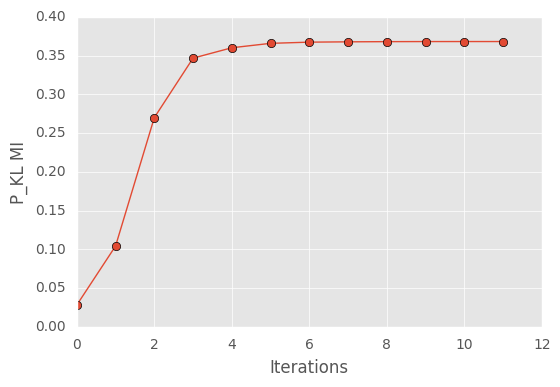

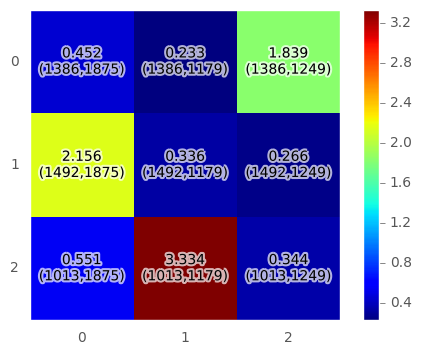

In [1]:
%matplotlib inline
import scipy.io as io
from sklearn.metrics import (adjusted_rand_score as ari,
                             normalized_mutual_info_score as nmi)
from coclust.coclustering import CoclustInfo
from coclust.evaluation.external import accuracy
from coclust.visualization import plot_delta_kl, plot_convergence


# Retrieve the Classic3  document-term matrix from a matlab file
print("1) Loading data")
file_name = "../datasets/classic3.mat"
matlab_dict = io.loadmat(file_name)
X = matlab_dict['A']

# Create and fit a model with 3 co-clusters
nb_clusters = 3
model = CoclustInfo(n_row_clusters=nb_clusters, n_col_clusters=nb_clusters,
                    n_init=4, random_state=0)
model.fit(X)

# Evaluate the results
print("CRITERION: %s" % model.criterion)
true_row_labels = matlab_dict['labels'].flatten()
predicted_row_labels = model.row_labels_
nmi_ = nmi(true_row_labels, predicted_row_labels)
ari_ = ari(true_row_labels, predicted_row_labels)
print("NMI: {}\nARI: {}".format(nmi_, ari_))
accuracy = accuracy(nb_clusters, true_row_labels, predicted_row_labels)
print("ACCURACY: %s" % accuracy)

# Show convergence
plot_convergence(model.criterions, 'P_KL MI')

plot_delta_kl(model)